# Machine Learning: Intro to Deep Learning (numpy only)

**Table of Contents**
1. [Perceptron](#an)
2. [Multi-Layer Perceptron (MLP)](#ann)
3. [Convolutional Networks](#cnn)
4. [Recurrent Networks](#rnn)

## 1. <a class="anchor" id="an">Perceptron</a>

In this section, let $\mathcal{D} = \{(\mathbf{x}_i \in \mathbb{R}^d, y_i \in \{0, 1\})\}_{i=1}^n$ be our training dataset. The samples are **i.i.d**.

### 1.1 Definition

The **Perceptron** is a binary classification model, introduced by [F. Rosemblatt](https://en.wikipedia.org/wiki/Frank_Rosenblatt) in the late 50's.

> The prediction function of the perceptron is 
$$
\mathbf{x} \mapsto f(\mathbf{x}; \theta=\{\mathbf{w}, b\}) = 
\begin{cases}
1 & \text{if } \langle \mathbf{x}, \mathbf{w} \rangle + b > 0, \\
0 & \text{otherwise}.
\end{cases}
$$

The following figure gives a representation of the Perceptron as an **Artificial Neuron**. 

<img src="images/perceptron.png" width="70%">

Notice that the **activation function** can be any *non-linear* function. Example of basic activation functions
- the **threshold** function (used by the standard Perceptron):
$$
    x \mapsto  \begin{cases}
        1 & \text{if } x > 0 \\
        0 & \text{otherwise}.
    \end{cases}
$$

- the **sigmoid** function (used by the Logistic Regression):
$$
 x \mapsto \frac{1}{1 + \exp(-x)},
$$

- the **tanh** (hyperbolic tangent) function:
$$
 x \mapsto \frac{\exp(2x) -1}{\exp(2x) + 1}.
$$

### 1.2 Perceptron learning rule

#### 1.2.1 Update Rule

For simplicity, let's change our inputs and add a $1$ in the first dimension, that is $\mathbf{x} = [1, x_1, \cdots, x_d]$ and $\mathbf{w} = [b, w_1, \cdots, w_d]$.

The Perceptron update rule of our parameter vector $\mathbf{w}$, for a training sample $(\mathbf{x}_i, y_i)$, is given by

$$
\mathbf{w} = \mathbf{w} + \eta  \big(y_i -  f(\mathbf{x}_i; \theta) \big)\mathbf{x}_i = 
\begin{cases}
        \mathbf{w}  & \text{if } y_i =  f(\mathbf{x}_i; \theta) \\
        \mathbf{w} + \eta \mathbf{x}_i & \text{if } y_i = 1 \text{ and } f(\mathbf{x}_i; \theta) = 0\\
        \mathbf{w} - \eta \mathbf{x}_i & \text{if } y_i = 0 \text{ and } f(\mathbf{x}_i; \theta) = 1\\
    \end{cases}
$$

where $\eta$ is the learning rate.
>Generaly, $\eta = 1$ for the Perceptron.

#### 1.2.2 Interpretation of the Update Rule

In the Perceptron update rule, notice that
- if $ y_i = 1 \text{ and } f(\mathbf{x}_i; \theta) = 0$, that is $\langle \mathbf{x}, \mathbf{w} \rangle < 0$ *i.e.* the $\cos(\angle (\mathbf{x}_i, \mathbf{w} )) < 0$, therefore we need to decrease the angle. And, by using the rule $\mathbf{w}_{new} = \mathbf{w} + \eta \mathbf{x}_i$, we get

$$\cos(\angle (\mathbf{x}_i, \mathbf{w}_{new} )) \sim \langle \mathbf{x}, \mathbf{w}_{new} \rangle = \langle \mathbf{x}_i, \mathbf{w} \rangle + \eta\langle \mathbf{x}_i, \mathbf{x}_i \rangle >  \langle \mathbf{x}_i, \mathbf{w} \rangle  \sim \cos(\angle (\mathbf{x}_i, \mathbf{w} )),  $$

- similarly if $ y_i = 0 \text{ and } f(\mathbf{x}_i; \theta) = 1$,   then $\cos(\angle (\mathbf{x}_i, \mathbf{w} )) > 0$, therefore we need to increase the angle. And, by using the rule $\mathbf{w}_{new} = \mathbf{w} - \eta \mathbf{x}_i$, we get 

$$\cos(\angle (\mathbf{x}_i, \mathbf{w}_{new} ))  \sim \langle \mathbf{x}, \mathbf{w}_{new} \rangle = \langle \mathbf{x}_i, \mathbf{w} \rangle - \eta\langle \mathbf{x}_i, \mathbf{x}_i \rangle <  \langle \mathbf{x}_i, \mathbf{w} \rangle  \sim \cos(\angle (\mathbf{x}_i, \mathbf{w} )).  $$


#### 1.2.3 Cost function

The cost function is defined as
$$
\mathcal{L}(\theta) = \frac{1}{2n} \sum_{i=1}^n \big(y_i - f(\mathbf{x}_i; \theta)\big)^2.
$$

### 1.3 Coding our Perceptron Model

#### 1.3.1 Designing the model

In [ ]:
import numpy as np
class MyPerceptron:
    def __init__(self, n_iter, lr=1):
        self.n_iter = n_iter
        self.lr = lr
    
        self.losses = []
        self.grads = []
        
    def init_params(self, n_feats):
        self.w = np.zeros((1, n_feats))
        self.b = 0.
    
    def _optimize(self, X, y):
        m = X.shape[0]

        # cost function 
        preds = np.squeeze(self.activation(X))
        distances = np.squeeze(preds != y)
        cost = np.mean(distances)
        
        """
        # computing the rules (for loop version )
        dw = 0; db = 0
        for i in range(len(X)): 
            if distances[i]:
                if preds[i] == 0 and y[i] ==1:
                    dw += -(1/m)*X[i,:] 
                    db += -(1/m)
                elif preds[i] == 1 and y[i] ==0:
                    dw += (1/m)*X[i,:]
                    db += (1/m)
        """
        # computing the rules (vectorized version)
        dw = (1/m)*np.dot(preds - y, X)
        db = (1/m)*np.sum(preds - y)
        
        grads = {"dLdw": dw, "dLdb": db}

        return grads, cost

    def activation(self, X):  
        """
            Compute the Sigmoid activation on the dataset
            
            X: (np-array) shape=(n_samples x n_feats)
                data matrix 
        """          
        return np.dot(self.w, X.T) + self.b > 0
    
    def fit(self, X, y):
        """
            Training the model
            
            X: (np-array) shape=(n_samples x n_feats)
                data matrix
            y: (np-array) shape=( n_samples)
                targets 
        """
        
        self.init_params(X.shape[1])
        
        for i in range(self.n_iter):
            grads, cost = self._optimize(X, y)
            #
            dLdw = grads['dLdw']
            dLdb = grads['dLdb']
            
            # gradient descent
            self.w = self.w - self.lr * dLdw
            self.b = self.b - self.lr * dLdb
            
            self.losses.append(cost)
            self.grads.append(grads)
            #if (i % 10 == 0):
            #    print("Standard Perceptron: Iter {}, Cost {}".format(i, cost))
            
        print("Standard Perceptron: Iter {}, Cost {}".format(i, cost))
    
    def predict(self, X):
        """
            Predicting the discrete labels
            
            X: (np-array) shape=(n_samples x n_feats)
                data matrix 
        """
        return self.activation(X)
        
    
    def score(self, X, y): 
        """
            computing the accuracy of the model
            
            X: (np-array) shape=(n_samples x n_feats)
                data matrix 
        """
        pred = self.predict(X)
        return (pred == y).mean()


#### 1.3.2 Testing the model

In [16]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import make_classification

def print_decision(X, y, clf, title="Decision Boundary"):
    plt.figure()
    h = .02
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax = plt.subplot(111)
    ax.contourf(xx, yy, Z, alpha=.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='black', s=25) 
    plt.title(title)

In [ ]:
# we create 200 separable points
X, y = make_classification(n_samples=200, n_features=2, n_redundant=0, n_informative=2,
                           random_state=0, n_clusters_per_class=2, class_sep=2.0)

#plt.figure()
#plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='black', s=25) 
#plt.title('Plot of the generated data and their label')
#plt.show()

In [ ]:
my_clf = MyPerceptron(n_iter=100, lr=1.)
my_clf.fit(X, y)
print_decision(X, y,  my_clf, "Decision Boundary of our Perceptron model")

In [ ]:
rand_points = np.random.randn(10, 2)
print_decision(rand_points, np.ones(10), my_clf, "Boundary on random samples")

## 2. <a class="anchor" id="ann" >Feed-Forward models</a>

In this section, let $\mathcal{D} = \{(\mathbf{x}_i \in \mathbb{R}^d,  y \in \mathbb{T})\}_{i=1}^n$ be our training dataset. The samples are **i.i.d**.
- For classification tasks $\mathbb{T} = \{0, \cdots, C-1\}$, where $C$ is number of classes
- And, for regression tasks $\mathbb{T} = \mathbb{R}$

### 2.1. Definition


#### 2.1.1 Basic idea

We have seen the Artificial Neuron (the Perceptron), and now we need to connect it to other neurons.
> Just like in nature neurons are interconnected to each other to obtain a complex network.

In this section, we will use a **feed-forward** representation to create our network:
- the artificial neurons are packed in **layers**
- each layer contains a certain number of neurons that do not interact with each other
- layers are concatened hierarchically (a layer is connected to a previous and next one)
- a neuron in a layer takes as input all the outputs of the previous layer

This representation is known as the **multi-layer perceptron (MLP)** or simple the **artificial neural network (ANN)**.

The figure below illustrates a basic MLP (with 2 layers).

<img src="images/ann0.png" width="70%">

#### 2.1.2 Formal definition

A feed-forward neural network $f(\cdot; \theta)$ is a **directed acyclic graph**, parametrized by $\theta$, 
that 
- applies a series of transformation to an input $\mathbf{x} \in \mathbb{R}^d$, layer-wise, 
- without recursion, 

to produce an output $\mathbf{y} = f(\mathbf{x}, \theta) \in \mathbb{R}^C$ , as depicted in below.


<img src="images/layer_wise_fnn.png" width="60%" />

Given a $K$ layer network -- here the input is not considered as a layer --, the $k$-th layer is characterized by a function
$f_k$ parametrized by $\theta_k$. 
In other words, 
> $f(\mathbf{x}, \theta) = f_K(\dots f_2(f_1(\mathbf{x}; \theta_1); \theta_2) \dots; \theta_K), \quad \forall \mathbf{x} \in \mathcal{I}$.

The $f_k$'s are of the form 
> $
 f_k(\mathbf{z}_{k-1}; \theta_k) = \mathbf{z}_k = \sigma_k(\mathbf{q}_{k}) = \sigma_k(\mathbf{W}_k\mathbf{z}_{k-1} + \mathbf{b}_k),
$

where 
- $\theta_k = \{\mathbf{W}_k, \mathbf{b}_k\}$,
- $\mathbf{W}_k \in \mathbb{R}^{h_k\times h_{k-1}}$ is known as the **weight matrix**, 
- $\mathbf{b}_k \in \mathbb{R}^{h_k}$ is the **bias vector**, 
- $\mathbf{z}_k \in \mathbb{R}^{h_k}$ is the output of the $k$-th layer, 
- $h_k$ is the dimension (the number of neurons) of the $k$-th layer, 
- $\sigma_k$ is a point-wise operator known as **activation function** of the layer, 
- and $\mathbf{q}_k$ is the **pre-activation vector**.

The figure below gives another illustration on the interaction between two layers.

<img src="images/ann1.png" width="60%">

In the previous section, we have seen three activation functions. 
Here are additional examples used in ANN:  
- **softmax**:  $\mathbf{t} \in \mathbb{R}^C  \mapsto [\dots, \frac{\exp(\mathbf{x}[i])}{\sum_{j=1}^C \exp(\mathbf{x}[j])}, \dots]$,
- **ReLU**:  $x \mapsto \max(0,x)$ (The Rectified Linear Unit ), 
- **PReLU**:  $x \mapsto \max(0,x) + a \min(0, x)$ (Parametric ReLU, with parameter $a$),
- **ELU**:  $x \mapsto \max(0,x) + a \min(0, \exp(x) -1)$ (Exponential Linear Unit, with parameter $a$).

> Note that, 
- differentiables activations (sigmoid, softmax, tanh) are prefered on an output layer,
- *linear unit* based are prefered on hidden layers.

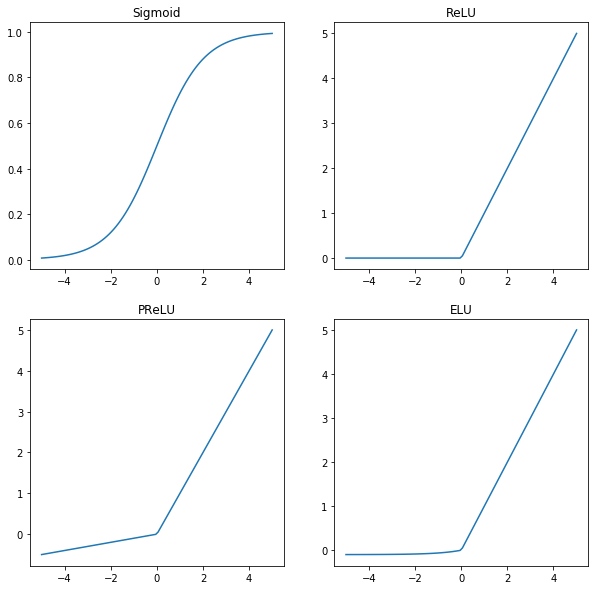

In [296]:
import numpy as np
import pylab as plt

sigmoid = lambda t : 1./(1. + np.exp(-t))
tanh = lambda t : (np.exp(2*t) - 1.)/(np.exp(2*t) + 1. )
relu = lambda t : np.maximum(0, t)
prelu = lambda t, a : np.maximum(0, t) + a *np.minimum(0, t)
elu = lambda t, a : np.maximum(0, t) + a * np.minimum(0, np.exp(t) -1)

xs = np.linspace(-5, 5, 100)

plt.figure(figsize=(10,10))

plt.subplot(221)
plt.plot(xs, sigmoid(xs))
plt.title('Sigmoid')

plt.subplot(222)
plt.plot(xs, relu(xs))
plt.title('ReLU')

plt.subplot(223)
plt.plot(xs, prelu(xs, 0.1))
plt.title('PReLU')

plt.subplot(224)
plt.plot(xs, elu(xs, 0.1))
plt.title('ELU')

plt.show()

#### 2.1.3 Example

Illustration of a complete ANN which 
- takes $9$-dimensional vectors as inputs,
- has $2$ hidden layers: the first layer has $4$ neurons, and the second has $2$,
- outputs a single real number.

>This architecture can be used, on $9$-dimensional, for
- classification into two class,
- regression.

<img src="images/ann2.png" width="60%">

### 2.2. Loss function

Various loss functions are used to train ANNs.
Depending on the tasks, a certain may be prefered to others.

> In this subsection, we will use an ANN of $K$ layers. 

#### 2.2.1 MSE loss

The Euclidian loss can be used for almost any task (classification and regression).

> The Euclidian loss averages the **Euclidian distances** ($\ell_2$-norms) between targets and predictions.  $\mathcal{L}$ is 
$$
\mathcal{L}(\theta) = \frac{1}{2n} \sum_{i=1}^n \|\mathbf{y}_i - f(\mathbf{x}_i; \theta)\|_2^2 =  \frac{1}{2n} \|\mathbf{Y} - f(\mathbf{X}; \theta)\|_F^2,
$$
where $\mathbf{Y} = [\mathbf{y}_1, \cdots, \mathbf{y}_n]$, $\mathbf{X} = [\mathbf{x}_1, \cdots, \mathbf{x}_n]$, and $f(\mathbf{X}; \theta) = [f(\mathbf{x}_1; \theta), \cdots, f(\mathbf{x}_n; \theta)]$.

#### 2.2.2 Cross-Entropy (Negative Log-likelihood)

The cross-entropy assumes that
- the targets are binary $\{0, 1\}$,
- the activation of the final layer is a Sigmoid.

The complete derivation of the negative log-likelihood is given in the *Binary Logistic Regression* section of the [previous lecture](Lect_02.ipynb#blr-loss).

> The cross-entropy loss, $\mathcal{L}$, is defined as 
$$
\mathcal{L}(\theta) = - \frac{1}{n}\sum_{i=1}^n y_i \log f(\mathbf{x}_i; \theta) + (1-y_i) \log (1 - f(\mathbf{x}_i; \theta)).
$$

#### 2.2.3 Softmax Loss

The softmax loss assumes that
- the targets belongs to $\{0, C-1\}$, where $C$ is the number of classes,
- the activation of the final layer is a Softmax,
- $f(\mathbf{x}; \theta) \in \mathbb{R}^C$, where $f(\mathbf{x}; \theta)[k]$ is the probability of belonging to the $k$-th class.

The complete derivation of the Softmax loss (*a.k.a* the multinomial logistic regression loss) is given in the *Multiclass Logistic Regression* section of the [previous lecture](Lect_02.ipynb#blr-loss).

> The Softmax loss, $\mathcal{L}$, is defined as 
$$ \mathcal{L}(\theta) = - \sum_{k=1}^C {\mathbb{1}\{y=k\}} \log f(\mathbf{x}; \theta) [k].$$

### 2.2 Back-propagation

Before writing the derivatives, let's recall some notations:
- $f_k(\cdot; \theta) = \mathbf{z}_k$, the output of the $k$-th layer,
- $\mathbf{z}_k = \sigma_k\big(\mathbf{W}_k\mathbf{z}_{k-1} + \mathbf{b}_k\big)$,
- $\mathbf{q}_k = \mathbf{W}_k\mathbf{z}_{k-1} + \mathbf{b}_k$, value of the $k$-th layer before activation,
- $w_{i,j}^{(k)} = \mathbf{W}_k[i,j]$, the weight in the $i$-th row and $j$-th column of the $k$-th layer's weight matrix $\mathbf{W}_k$.

#### 2.2.1 <a class="anchor" id="backprop-lastlayer-matrixform">Backprop: Derivations w.r.t. to the Last Layer</a>

>The gradient of the  parameters of the last layer ( $\mathbf{W}_{K}, \mathbf{b}_K$) are as follows
$$
\begin{equation*}
    \begin{split}
        \nabla_{\mathbf{W}_{K}} \mathcal{L} (\theta) 
        &= \Big[\big(\nabla_{\mathbf{z}_{K}} \mathcal{L} (\theta) \big) \odot \sigma_K'(\mathbf{q}_{K}) \Big] \big( \mathbf{z}_{K-1}^T\big),\\
        &\\
        \nabla_{\mathbf{b}_{K}} \mathcal{L} (\theta) &= \big(\nabla_{\mathbf{z}_{K}} \mathcal{L} (\theta) \big) \odot \sigma_K'(\mathbf{q}_{K}) ,\\
        &\\
    \end{split}
\end{equation*}
$$
where 
- $\sigma_K'(\mathbf{q}_{k})$ is a point-wise derivative on each element of the vector $\mathbf{q}_{k}$, 
- $\odot$ is a point-wise product.

>**Proof**: Here, we will give the complete derivation to obtain the previous gradients in a matrix form (see [here](#backprop-nonmatrix) for the non-matrix based derivations)
$$
\begin{equation*}
    \begin{split}
    &\\
        \nabla_{\mathbf{W}_{K}} \mathcal{L} (\theta) &= \big(\nabla_{\mathbf{q}_{K}} \mathcal{L} (\theta) \big) ^T \big(\nabla_{\mathbf{W}_{K}} \mathbf{q}_{K}\big), & \text{ \ \ using the chain rule }\\
        &= \big(\nabla_{\mathbf{z}_{K}} \mathcal{L} (\theta) \big)^T \left\{ \nabla_{\mathbf{W}_{K}} \mathbf{q}_{K}[i] \right\}_{i=1}^{h_k}, & \text{ vector w.r.t matrix } \\
        &= \big(\nabla_{\mathbf{z}_{K}} \mathcal{L} (\theta) \big)^T
        \left\{ \begin{bmatrix}
\frac{\partial \mathbf{q}_{K}[i]}{\partial w_{1,1}^{(K)}} & \frac{\partial \mathbf{q}_{K}[i]}{\partial w_{1,2}^{(K)}}&\cdots & \frac{\partial \mathbf{q}_{K}[i]}{\partial w_{1,h_{K-1}}^{(K)}}\\
\frac{\partial \mathbf{q}_{K}[i]}{\partial w_{2,1}^{(K)}} &\frac{\partial \mathbf{q}_{K}[i]}{\partial w_{2,2}^{(K)}}&\cdots & \frac{\partial \mathbf{q}_{K}[i]}{\partial w_{2,h_{K-1}}^{(K)}}\\
\vdots & \ddots & &\vdots\\ 
\frac{\partial \mathbf{q}_{K}[i]}{\partial w_{h_K,1}^{(K)}}& &\cdots& \frac{\partial \mathbf{q}_{K}[i]}{\partial w_{h_K,h_{K-1}}^{(K)}}
\end{bmatrix} \right\}_{i=1}^{h_k}, & \text{ Jacobian matrix }\\ 
    \end{split}
\end{equation*}
$$
where
$$
\frac{\partial \mathbf{q}_{K}[i]}{\partial  w_{j,l}^{(K)}} = 
\begin{cases}
0 & \text{ if } i \ne j \\
\mathbf{z}_{K-1}[l] & \text{ otherwise }
\end{cases} \quad \text{since } \mathbf{q}_{k}[p] = \sum_{c=1}^{h_k} w_{p,c}^{(k)} \mathbf{z}_{k-1}[c] + \mathbf{b}_{k}[p]
$$
Therfore,
$$
\nabla_{\mathbf{W}_{K}} \mathbf{q}_{K}[i] = 
\begin{bmatrix} \mathbf{z}_{K-1}^T \\
\mathbf{0} \\
\end{bmatrix}, \quad  \text{ with } \mathbf{0} \in \{0\}^{(h_K-1) \times h_{K-1}}.$$
Let's assume that
$$\nabla_{\mathbf{z}_{K}} \mathcal{L} (\theta) = [a_1, a_2, \cdots, a_K]^T.$$
Then, we can write
$$
\begin{equation*}
    \begin{split}
\big(\nabla_{\mathbf{z}_{K}} \mathcal{L} (\theta) \big)^T \left\{ \nabla_{\mathbf{W}_{K}} \mathbf{q}_{K}[i] \right\}_{i=1}^{h_k} &= \{a_i \mathbf{z}_{K-1}^T\}_{i=1}^{h_k} \\
&= \big(\nabla_{\mathbf{z}_{K}} \mathcal{L} (\theta) \big) \mathbf{z}_{K-1}^T. \\
&\\
    \end{split}
\end{equation*}
$$
So the current expression of the gradient is
$$
\begin{equation*}
    \begin{split}
    &\\
        \nabla_{\mathbf{W}_{K}} \mathcal{L} (\theta) &= \big(\nabla_{\mathbf{q}_{K}} \mathcal{L} (\theta) \big) \big(\mathbf{z}_{K-1}^T\big), \\
        &= \left[\big(\nabla_{\mathbf{z}_{K}} \mathcal{L} (\theta) \big) \big(\nabla_{\mathbf{q}_{K}} \mathbf{z}_{K}\big) \right] \big(\mathbf{z}_{K-1}^T\big),\\ 
        &\\
    \end{split}
\end{equation*}
$$
Let's analyze the expression of the Jacobian matrix $\nabla_{\mathbf{q}_{k}} \mathbf{z}_{k}$, for some $k$-th layer.
$$
\begin{equation*}
    \begin{split}
    &\\
\nabla_{\mathbf{q}_{k}} \mathbf{z}_{k} &= 
\begin{bmatrix}
\frac{\partial \mathbf{z}_{k}[1]}{\partial \mathbf{q}_{k}[1]} & \frac{\partial \mathbf{z}_{k}[1]}{\partial \mathbf{q}_{k}[2]}&\cdots & \frac{\partial \mathbf{z}_{k}[1]}{\partial \mathbf{q}_{k-1}[h_{k}]}\\
\frac{\partial \mathbf{z}_{k}[2]}{\partial \mathbf{q}_{k}[2]} & \frac{\partial \mathbf{z}_{k}[2]}{\partial \mathbf{q}_{k}[2]}&\cdots & \frac{\partial \mathbf{z}_{k}[2]}{\partial \mathbf{q}_{k}[h_{k}]}\\
\vdots & \ddots & &\vdots\\ 
\frac{\partial \mathbf{z}_{k}[h_k]}{\partial \mathbf{q}_{k}[1]} & &\cdots& \frac{\partial \mathbf{z}_{k}[h_k]}{\partial \mathbf{q}_{k}[h_{k}]}
\end{bmatrix},
    \end{split}
\end{equation*}
$$
where 
$$
\frac{\partial \mathbf{z}_{k}[i]}{\partial \mathbf{q}_{k}[j]} = \frac{\partial \sigma_{k}(\mathbf{q}_{k}[i])}{\partial \mathbf{q}_{k}[j]} = 0 \quad \forall i \ne j.
$$
Therefore, $\nabla_{\mathbf{q}_{k}} \mathbf{z}_{k}$ is a diagonal matrix, and we will use the notation 
$$
\big(\nabla_{\mathbf{z}_{k}} \mathcal{L} (\theta)\big)^T  \big(\nabla_{\mathbf{q}_{k}} \mathbf{z}_{k} \big) = \big(\nabla_{\mathbf{z}_{k}} \mathcal{L} (\theta)\big) \odot \sigma_k'(\mathbf{q}_{k}).
$$
This conclude our proof (the derivation w.r.t the bias vector follows the same structure).

With the previously computed gradients, we can update all the **weights of the output layer** using standard gradient descent.

> **Recalling the gradient descent rule, for a parameter set $\theta$.** Let $\theta^t$ be the value of $\theta$ at the $t$-th iteration, $\theta^0$ being the initialization of the parameters of the network,
the update rule of the standard gradient descent  is as follows,
$$
\theta^{t+1} \leftarrow \theta^{t} - \eta \nabla_{\theta^{t}}\mathcal{L}(\theta^{t}) , 
$$
where $\nabla_{\theta} \mathcal{L}(\theta)$ is the **gradient** of $\mathcal{L}$ w.r.t the $\theta$, and $\eta$ is the step-size also known as **learning rate**. The parameters in $\theta$ are updated sequentially layer after another,
starting with the output one, by back-propagating the loss value, as illustrated in the figure below.


**Question: How about the parameters in the hidden layers?**

**Solution**: Using the following two steps.
1. We use the **chain rule** to compute the gradients of the loss w.r.t the hidden parameters,
2. Then, the gradients are **backpropagated** in the network to update the hidden parameters.

The figure below illustrates the backpropagation procedure, for a certain loss function $\ell$.

<img src="images/layer_wise_fnn_bprop.png" width="70%">

#### 2.2.2 <a class="anchor" id="backprop-nonmatrix">Backprop Derivations</a>

Consider the network depicted below.

<img src="images/backprop_net.png" width="70%">

We want to compute $\frac{\partial \mathcal{L}(\theta) }{\partial w_{i,j}^{(k)}}$ (the derivative of the loss w.r.t to the parameter $w_{i,j}^{(k)}$).

<img src="images/backprop.png" width="70%">

Let's derive the expression of  $\frac{\partial \mathcal{L}(\theta) }{\partial w_{i,j}^{(k)}}$, assuming that
- the derivatives of the loss w.r.t the preactivations of the $(k+1)$-th layer is given (*i.e.* $\frac{\partial \mathcal{L}(\theta) }{\partial \mathbf{q}_{k+1}}$ is given).

>$$
\begin{equation*}
    \begin{split}
        \frac{\partial \mathcal{L}(\theta) }{\partial w_{i,j}^{(k)}} &= \big( \frac{\partial \mathcal{L}(\theta) }{\partial \mathbf{q}_{k}[i]} \big) \big( \frac{\partial \mathbf{q}_{k}[i]}{\partial w_{i,j}^{(k)}} \big),& \text{ weights interact directly with preactivations}\\
        &= \big( \frac{\partial \mathcal{L}(\theta) }{\partial \mathbf{z}_{k}[i]}\big) \big( \frac{\partial\mathbf{z}_{k}[i] }{\partial \mathbf{q}_{k}[i]}\big) \big( \frac{\partial \mathbf{q}_{k}[i]}{\partial w_{i,j}^{(k)}} \big), & \text{ preactivations interacts with activations}\\
        &= \left[ \sum_{p=1}^{h_{k+1}} \big( \frac{\partial \mathcal{L}(\theta) }{\partial \mathbf{q}_{k+1}[p]}\big) \big( \frac{\partial \mathbf{q}_{k+1}[p] }{\partial \mathbf{z}_{k}[i]}\big) \right] \big( \frac{\partial\mathbf{z}_{k}[i] }{\partial \mathbf{q}_{k}[i]}\big) \big( \frac{\partial \mathbf{q}_{k}[i]}{\partial w_{i,j}^{(k)}} \big), & \text{the } \mathbf{z}_k\text{'s interact with all the } \mathbf{q}_{k+1}\text{'s}\\
        &= \left[ \sum_{p=1}^{h_{k+1}} \big( \frac{\partial \mathcal{L}(\theta) }{\partial \mathbf{q}_{k+1}[p]}\big) \big(w_{p,i}^{(k+1)} \big) \right] \big( \frac{\partial\mathbf{z}_{k}[i] }{\partial \mathbf{q}_{k}[i]}\big) \big( \frac{\partial \mathbf{q}_{k}[i]}{\partial w_{i,j}^{(k)}} \big), & \text{since } \mathbf{q}_{k+1}[p] = \sum_{c=1}^{h_k} w_{p,c}^{(k+1)} \mathbf{z}_{k}[c] + \mathbf{b}_{k+1}[p]\\
        &= \left[ \sum_{p=1}^{h_{k+1}} \big( \frac{\partial \mathcal{L}(\theta) }{\partial \mathbf{q}_{k+1}[p]}\big) \big(w_{p,i}^{(k+1)} \big) \right] \big( \sigma_{k}'( \mathbf{q}_{k}[i]) \big) \big( \frac{\partial \mathbf{q}_{k}[i]}{\partial w_{i,j}^{(k)}} \big), & \text{since } \mathbf{z}_{k}[i] = \sigma_k( \mathbf{q}_{k}[i])\\
        &= \left[ \sum_{p=1}^{h_{k+1}} \big( \frac{\partial \mathcal{L}(\theta) }{\partial \mathbf{q}_{k+1}[p]}\big) \big(w_{p,i}^{(k+1)} \big) \right] \big( \sigma_{k}'( \mathbf{q}_{k}[i]) \big) \big( \mathbf{z}_{k-1}[j]  \big). &\\
    \end{split}
\end{equation*}
$$

#### 2.2.3 Backprop Vectorized Form

We will now rewrite the previous expressions in a more readable way using a matrix formulation.

> Recall that $$
\begin{equation*}
    \begin{split}
        \nabla_{\mathbf{W}_{k}} \mathcal{L} (\theta) &=\left[ \big(\nabla_{\mathbf{z}_{k}} \mathcal{L} (\theta)\big) \odot \sigma_p'(\mathbf{q}_{p}) \right] \big(\mathbf{z}_{k-1}^T\big).\\
        &\\ 
    \end{split}
\end{equation*}
$$
Refer to section [2.2.1](#backprop-lastlayer-matrixform) for the complete proof. 

Let's derive the complete vectorized expression of the gradients, assuming that $\frac{\partial \mathcal{L}(\theta) }{\partial \mathbf{q}_{k+1}}$  is given.

>$$
\begin{equation*}
    \begin{split}
        \nabla_{\mathbf{W}_{k}} \mathcal{L} (\theta) &=  \left[ \big(\nabla_{\mathbf{z}_{k}} \mathcal{L} (\theta)\big) \odot \sigma_p'(\mathbf{q}_{p}) \right] \big(\mathbf{z}_{k-1}^T\big)\\
        &= \left[  \big( \nabla_{\mathbf{z}_{k}} \mathbf{q}_{k+1} \big) \Big(\big(\nabla_{\mathbf{q}_{k+1}} \mathcal{L} (\theta)\big) \odot \sigma_p'(\mathbf{q}_{p})  \Big)\right] \big(\mathbf{z}_{k-1}^T\big), \quad \text{ since } \mathbf{q}_k = \mathbf{W}_k\mathbf{z}_{k-1} + \mathbf{b}_k \\
        &= \Pi_{p=K-1}^{k} \left[  \big( \nabla_{\mathbf{z}_{p}} \mathbf{q}_{p+1} \big) \Big(\big(\nabla_{\mathbf{q}_{p+1}} \mathcal{L} (\theta)\big) \odot \sigma_p'(\mathbf{q}_{p}) \Big) \right] \big(\mathbf{z}_{k-1}^T\big), \quad \text{ reverse loop }\\
        &=  \Pi_{p=K-1}^{k} \left[ \big(\mathbf{W}_{p+1}^T \big) \Big(\big(\nabla_{\mathbf{q}_{p+1}} \mathcal{L} (\theta)\big)  \odot \sigma_p'(\mathbf{q}_{p})\Big) \right] \big(\mathbf{z}_{k-1}^T\big), \quad \text{ final expression }\\
        &\\
        &\\
        \nabla_{\mathbf{b}_{k}} \mathcal{L} (\theta) &=  \Pi_{p=K-1}^{k} \left[ \big(\mathbf{W}_{p+1}^T \big) \Big(\big(\nabla_{\mathbf{q}_{p+1}} \mathcal{L} (\theta)\big)  \odot \sigma_k'(\mathbf{q}_{k}) \Big)\right] \\
    \end{split}
\end{equation*}
$$

#### 2.2.2 Backprop Overall Algorithm (Vectorized form)

- The goal is to have an algorithm to compute the derivatives of the $k$-th hidden parameters ( $\mathbf{W}_{k}, \mathbf{b}_k$).

> Note that
$$
\nabla_{\mathbf{q}_{k}} \mathcal{L}(\theta) = \big(\nabla_{\mathbf{z}_{k}} \mathcal{L} (\theta) \big)^T \big(\nabla_{\mathbf{q}_{k}} \mathbf{z}_{k}\big).
$$

The algorithm is as follows

1. we compute the gradients of the hidden parameters
>$$
\begin{equation*}
    \begin{split}
        \nabla_{\mathbf{W}_{k}} \mathcal{L} (\theta) &= \big(\nabla_{\mathbf{q}_{k}} \mathcal{L} (\theta) \big)^T \big(\nabla_{\mathbf{W}_{k}} \mathbf{q}_{k}\big) &= \big(\nabla_{\mathbf{q}_{k}} \mathcal{L} (\theta) \big) \big(\mathbf{z}_{k-1}^T\big)\\
        \nabla_{\mathbf{b}_{k}} \mathcal{L} (\theta) &= \big(\nabla_{\mathbf{q}_{k}} \mathcal{L} (\theta) \big)^T \big(\nabla_{\mathbf{b}_{k}} \mathbf{q}_{k}\big) &= \big(\nabla_{\mathbf{q}_{k}} \mathcal{L} (\theta) \big) \\
    \end{split}
\end{equation*}
$$

2. we compute the gradient of the loss w.r.t the activations of the hidden layer below ($k-1$)
>$$
\nabla_{\mathbf{z}_{k-1}} \mathcal{L} (\theta) = \big(\nabla_{\mathbf{z}_{k-1}} \mathbf{z}_{k}\big) \big(\nabla_{\mathbf{q}_{k}} \mathcal{L} (\theta) \big)   =  \big(\mathbf{W}_{k}^T\big) \big(\nabla_{\mathbf{q}_{k}} \mathcal{L} (\theta) \big)
$$

3. we compute the gradient of the loss w.r.t the pre-activations of the hidden layer below ($k-1$)

>$$
\begin{equation*}
\begin{split}
\nabla_{\mathbf{q}_{k-1}} \mathcal{L} (\theta) &= \big(\nabla_{\mathbf{z}_{k-1}} \mathcal{L} (\theta) \big) \odot \sigma_{k-1}'(\mathbf{q}_{k-1})
\end{split}
\end{equation*}
$$

### 2.3. Improving the Gradient Descent algorithm

Note that, the weights in the previous equation will remain unchanged when the loss plateaus, since the gradient will be null. 
Thus the necessity of using a **momentum**, $\nu$, to continue the learning. The update rule becomes

$$
\begin{equation*}
    \begin{split}
        \nu^{(t+1)} &\leftarrow   \rho \nu^{(t)} + (1 - \rho)  \nabla \mathcal{L}(\theta^{(t-1)}),\\
        \theta^{(t)} &\leftarrow   \theta^{(t-1)} - \eta \nu^{(t+1)},
    \end{split}
\end{equation*}
$$

where $\rho \in [0,1]$ is a hyper-parameter that indicates how much of the previous gradients we are keeping. 

### 2.4 Coding a Neural Network (long code, be ready!)

In [290]:
import numpy as np

###############################################
#########    LOSSES 
###############################################

class MeanSquareLoss:
    @staticmethod
    def call(g, p):
        """
            Compute the MSE between two arrays of the same size
            
            Params
            -------
            g: (array-like)
               ground-truths
            p: (array-like)
                predictions
            
            Returns
            -------
            d: (real number) the MSE value
            
        """
        g = g.reshape(p.shape)
        return (.5/len(p))*np.sum((g - p)**2)
    
    @staticmethod
    def grad(g, p):
        """
            Compute the GRADIENT of the MSE w.r.t the input ''p''
            
            Params
            -------
            g: (array-like)
               ground-truths
            p: (array-like)
                predictions
            
            Returns
            -------
            d: (array-like) the gradient
            
        """
        g = g.reshape(p.shape)
        return (1./len(p))*(p - g)
    
class BinaryCrossEntropyLoss:
    @staticmethod
    def call(g, p):
        """
            compute the binary cross-entropy between two arrays of the same size
            
            Params
            -------
            g: (array-like)
               ground-truths
            p: (array-like)
                predictions
            
            Returns
            -------
            d: (real number) the binary CE
            
        """
        g = g.reshape(p.shape)
        return -(1./len(p))*np.sum(g*np.log(p) + (1. - g)*np.log(1. - p))
    @staticmethod
    def grad(g, p):
        """
            compute the Gradient of the BCE w.r.t the parameter ''p''
            
            Params
            -------
            g: (array-like)
               ground-truths
            p: (array-like)
                predictions
            
            Returns
            -------
            d: (array-like) the gradient
            
        """
        g = g.reshape(p.shape)
        return - (np.divide(g, np.maximum(p, 10e-5)) - np.divide(1. - g, 1. - p))

    
###############################################
#########    ACTIVATIONS 
###############################################

class Sigmoid:
    @staticmethod
    def call(x):
        """
            Compute a sigmoid activation on the input
            A point-wise operation is performed for array-like inputs 
            
            Params
            -------
            x: (array-like, or number)
                inputs
            
            Returns
            -------
            d: (same shape with the inputs)
        """
        return 1./(1. + np.exp(-x))
    @staticmethod
    def grad(x):
        """
            Compute a gradient of the sigmoid activation w.r.t the the input
            A point-wise operation is performed for array-like inputs 
            
            Params
            -------
            x: (array-like, or number)
                inputs
            
            Returns
            -------
            d: (same shape with the inputs)
        """
        a = Sigmoid.call(x)
        return a*(1. - a)

class ReLU:
    @staticmethod
    def call(x):
        """
            Compute a ReLU activation on the input
            A point-wise operation is performed for array-like inputs 
            
            Params
            -------
            x: (array-like, or number)
                inputs
            
            Returns
            -------
            d: (same shape with the inputs)
        """
        return np.maximum(0, x)
 
    @staticmethod
    def grad(x):
        """
            Compute a gradient of the ReLU w.r.t the inputs
            A point-wise operation is performed for array-like inputs 
            
            Params
            -------
            x: (array-like, or number)
                inputs
            
            Returns
            -------
            d: (same shape with the inputs)
        """
        dx = np.ones_like(x)
        dx[x <= 0] = 0
        return dx

class Softmax:
    @staticmethod
    def call(x):
        """
            Compute a Softmax activation on the input
            A point-wise operation is performed for array-like inputs 
            
            Params
            -------
            x: (array-like, or number)
                inputs
            
            Returns
            -------
            d: (same shape with the inputs)
        """
        v = np.exp(x + 10e-6) 
        return v/(np.sum(v))
    @staticmethod
    def grad(x):
        """
            Compute a gradient of the softmax activation w.r.t the the input
            A point-wise operation is performed for array-like inputs 
            
            Params
            -------
            x: (array-like, or number)
                inputs
            
            Returns
            -------
            d: (same shape with the inputs)
        """
        v = np.exp(x) 
        return v - Softmax.call(x)**2

    
class NoActivation:
    @staticmethod
    def call(x):
        return x
    @staticmethod
    def grad(x):
        return x

###############################################
#########    OPTIMIZERS 
###############################################

class SGDOptimizer:
    def __init__(self, lr=0.1, rho=0.):
        """
            A class containing the Stochastic Gradient Descent algorithm 
            
            Params
            -------
            lr: (float)
                the learning rate
            rho: (float)
                the value of the momentum
        """
        self.lr = lr
        self.rho = rho
        
        # initializing the vectors of forwards outputs
        self.outputs = []
        # initializing the vectors of backwards outputs (the gradients)
        self.grads = []
    
    def update_grads(self, grads, k):
        """
            Compute the changes to the gradients
            
            Params
            -------
            grads: (list)
                list of gradients of a certain layer 
            k: (int)
                index of the layer
        """
        # momentum update
        self.grads[k] = [self.rho*grad + (1. - self.rho)*grad for grad in grads]
        # return the final change to make the parameters
        return [-self.lr * grad for grad in self.grads[k]]
    
    def apply_gradients(self, layers, grad_loss):
        """
            Compute the gradients of the loss w.r.t each layers' parameters 
            and update the parameters. 
            
            Params
            -------
            layers: (list)
                list of layers (the inputs are in layers[0]) 
            grad_loss: (array-like)
                gradient of the loss w.r.t the final output
        """
        K = len(layers)-1 
        for k in range(K, -1, -1): 
            l_grads, grad_loss = layers[k].compute_gradients(self.outputs[k], grad_loss )
            self.grads[k] = l_grads
            layers[k].update_params(self.update_grads(l_grads, k))

        
###############################################
#########    LAYERS 
###############################################

class DenseLayer:
    def __init__(self, n_neurons, activation="sigmoid"):
        """
            A Dense layer class (Fully-connected layer)
            
            Params
            -------
            n_neurons: (int)
                number of neurons in the layer
            activation: (string)
                activation function to use
        """
        self.N = n_neurons
        if activation == "sigmoid":
            self.activ_func = Sigmoid
        elif activation == 'relu':
            self.activ_func = ReLU
        elif activation == "softmax":
            self.activ_func = Softmax
        else:
            self.activ_func = NoActivation
            
    
    def build(self, input_shape):
        """
            Initialize the layer by creating the parameters
            
            Params
            -------
            input_shape: (list or tuple or array)
                shape of the inputs. Must be of the form (batch_size, input_dim)
        """
        self.W = np.random.randn(self.N, input_shape[1])
        self.b = np.random.randn(self.N)
        
    def preactiv(self, inputs):
        """
            Computes the preactivation of the inputs
            
            Params
            -------
            inputs: (array-like), shape=(batch_size, input_dim)
                the inputs to the layer
        """
        return np.dot( inputs, self.W.T) +  self.b
        
    def call(self, inputs):
        """
            Computes the preactivation and apply the activation function
            
            Params
            -------
            inputs: (array-like), shape=(batch_size, input_dim)
                the inputs to the layer
        """
        return  self.activ_func.call(self.preactiv(inputs))
    
    def get_output_shape(self, input_shape):
        """
            Returns the output shapte of the layer
            
            Params
            -------
            input_shape: (list or tuple or array)
                shape of the inputs. Must be of the form (batch_size, input_dim)
        """
        out_shape = list(input_shape)
        out_shape[-1] = self.N
        return out_shape
    
    def compute_gradients(self, inputs, back_grads): 
        """
            Computes the gradients of this layers' parameters
            
            Params
            -------
            inputs: (array-like), shape=(batch_size, input_dim)
                the inputs to the layer
            back_grads: (array-like), shape=(batch_size, self.N)
                gradients backpropagated from the next layer
        """
        m = inputs.shape[0]
        dzk_dqk = self.activ_func.grad(self.preactiv(inputs))
        back_grads = back_grads * dzk_dqk
        
        grad_w = np.dot(back_grads.T, inputs) / m
        grad_b = np.sum(back_grads, axis=0) / m
         
        back_grads = np.dot(back_grads, self.W) 
        
        return [grad_w, grad_b], back_grads
    
    def update_params(self, grads):
        """
            Updates the parameters using the changes provided by the Optimizer class
            
            Params
            -------
            grads: (list)
                gradients of each parameter of this layer 
        """
        self.W += grads[0]
        self.b += grads[1]

###############################################
#########    MODEL 
###############################################

class NN:
    def __init__(self, input_shape):
        """
            A generic Neural Network class
            
            Params
            -------
            input_shape: (list or tuple or array)
                shape of the inputs. Must be of the form (batch_size, input_dim)
        """
        self.input_shape = input_shape
        self.layers = []
        
    def add_layer(self, layer):
        self.layers.append(layer)
    
    def compile_model(self, loss, optimizer):
        self.loss = loss
        self.opt = optimizer
        self.n_layers = len(self.layers)
        
        input_shape = self.input_shape
        for l in self.layers:
            l.build(input_shape)
            input_shape = l.get_output_shape(input_shape)
            self.opt.outputs.append([])
            self.opt.grads.append([])
            
        self.opt.outputs.append([])
        self.opt.grads.append([])
    
    def forward(self, X):
        self.opt.outputs[0] = X
        for i in range(1, self.n_layers+1):
            self.opt.outputs[i]  = self.layers[i-1].call(self.opt.outputs[i-1])
        return self.opt.outputs[-1]
    
    def backward(self, y, zK):
        grad_loss = self.loss.grad(y, zK)
        self.opt.apply_gradients(self.layers, grad_loss)
        return grad_loss
    
    def fit(self, X, y, n_iter):
        """
            Training the model
            
            X: (np-array) shape=(n_samples x n_feats)
                data matrix
            y: (np-array) shape=( n_samples)
                targets 
            n_iter: (int) 
                number of iterations
        """
        self.losses = []
        for i in range(n_iter):
            output = self.forward(X)
            self.losses.append(self.loss.call(y, output))
            self.backward(y, output)
            
    
    def predict(self, X):
        """
            Predicting the discrete labels
            
            X: (np-array) shape=(n_samples x n_feats)
                data matrix 
        """
        return self.forward(X)

###############################################
#########    UTILS 
###############################################

def one_hot_encode(y):
    """
        Convert a vector of targets [1, 2, 0] to its one-hot encoded 
        version, which is the matrix [[0, 1, 0], [0, 0, 1], [1, 0, 0]].

        y: (np-array) shape=( n_samples)
            targets 
    """
    v = np.zeros((y.size, len(np.unique(y))))
    v[np.arange(y.size), y.astype(int)] = 1
    return v


### 2.5. Example on toy datasets

#### 2.5.1 Creating the dataset

In [309]:
from sklearn.datasets import make_blobs, make_circles
import pylab as plt
#X, y = make_blobs(n_samples=50, centers=2)
X, y = make_circles(100, factor=.2, noise=.1)

#### 2.5.2 Designing an ANN

In [318]:
my_mlp = NN(X.shape)
my_mlp.add_layer(DenseLayer(10, activation="relu"))
my_mlp.add_layer(DenseLayer(100, activation="relu")) 
my_mlp.add_layer(DenseLayer(1, activation="sigmoid"))
my_mlp.compile_model(BinaryCrossEntropyLoss, SGDOptimizer(lr=.1, rho=0.9))

#### 2.5.3 Training

In [319]:
my_mlp.fit(X, y, 2000)
print("score = ", np.mean(np.squeeze(my_mlp.predict(X) >=0.5).astype(float) == y))

1.0


#### 2.5.4 Plotting the losses curve

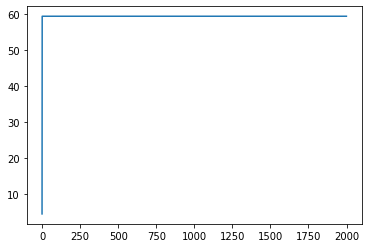

In [316]:
plt.plot(range(len(my_mlp.losses)), my_mlp.losses);
plt.show()

#### 2.5.5 Plotting the decision boundary

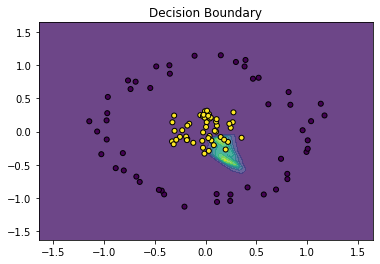

In [317]:
print_decision(X, y, my_mlp)

### 2.5. Example on MNIST

In [204]:
import os
import pickle
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

# Loading the images
if not os.path.exists("mnist_784_data.pkl"):
    X_mnist, y_mnist = fetch_openml('mnist_784', version=1, return_X_y=True)
    y_mnist = one_hot_encode(y_mnist.astype(int))
    with open('mnist_784_data.pkl','wb') as f:
         pickle.dump([X_mnist, y_mnist], f) 
else:
    with open('mnist_784_data.pkl','rb') as f:
        X_mnist, y_mnist = pickle.load(f)

# shuffling part
random_state = check_random_state(0)
permutation = random_state.permutation(X_mnist.shape[0])
X_mnist = X_mnist[permutation]
y_mnist = y_mnist[permutation]
X = X.reshape((X.shape[0], -1))

# data splitting
X_train_mnist, X_test_mnist, y_train_mnist, y_test_mnist = train_test_split(
    X_mnist, y_mnist, train_size=5000, test_size=10000)

# Normalization
scaler = StandardScaler()
X_train_mnist = scaler.fit_transform(X_train_mnist)
X_test_mnist = scaler.transform(X_test_mnist)


In [205]:
y_train_mnist[:100].shape

(100, 10)

In [271]:
my_mlp = NN(X_train_mnist.shape)
my_mlp.add_layer(DenseLayer(30, activation="relu")) 
my_mlp.add_layer(DenseLayer(150, activation="relu")) 
my_mlp.add_layer(DenseLayer(100, activation="relu")) 
my_mlp.add_layer(DenseLayer(10, activation="sigmoid"))
my_mlp.compile_model(EuclidianLoss, SGDOptimizer(0.8, rho=0.9))

In [272]:
my_mlp.fit(X_train_mnist[:100], y_train_mnist[:100], 500)

C:\Users\pc\anaconda3\lib\site-packages\ipykernel_launcher.py:109: RuntimeWarning: overflow encountered in exp


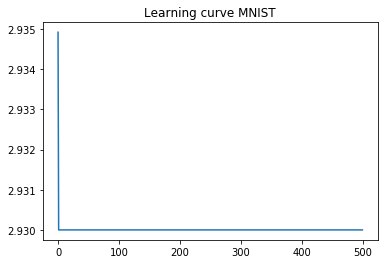

In [273]:
plt.plot(range(len(my_mlp.losses)), my_mlp.losses)
plt.title("Learning curve MNIST")
plt.show()

In [261]:
print(np.mean(np.squeeze(my_mlp.predict(X_train_mnist[:100]) >=0.5).astype(float) == y_train_mnist[:100]))

0.521


C:\Users\pc\anaconda3\lib\site-packages\ipykernel_launcher.py:109: RuntimeWarning: overflow encountered in exp


C:\Users\pc\anaconda3\lib\site-packages\ipykernel_launcher.py:109: RuntimeWarning: overflow encountered in exp


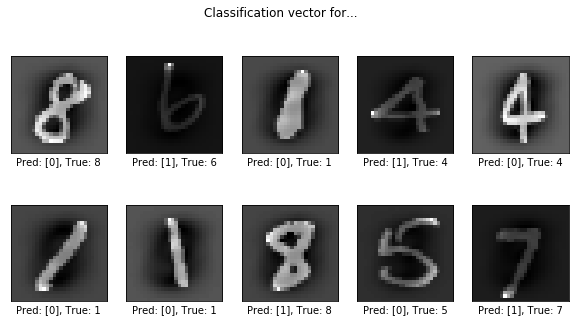

In [262]:
plt.figure(figsize=(10, 5)) 
for i in range(10):
    pred_plot = plt.subplot(2, 5, i + 1)
    
    pred = np.argmax(my_mlp.predict(X_test_mnist[i:i+1]), 1)
    
    pred_plot.imshow(X_test_mnist[i].reshape(28, 28), interpolation='nearest', 
                     cmap=plt.cm.gray)
    pred_plot.set_xticks(())
    pred_plot.set_yticks(())
    pred_plot.set_xlabel('Pred: %s, True: %s' %(pred, np.argmax(y_test_mnist[i]) ))
plt.suptitle('Classification vector for...')
plt.show()

## 3. <a class="anchor" id="cnn">Convolutional Models</a>

###  3.1. Definition


Convolutional neural networks (CNNs) are particular types of FNN -- introduced in this [paper](http://yann.lecun.com/exdb/publis/pdf/lecun-89e.pdf) by 
[Yann LeCun](https://fr.wikipedia.org/wiki/Yann_Le_Cun) and collaborators-- that takes into account the structure/topology of their inputs in the processing.

They tackle the following points that are ignored in standard FNNs.

- **Dealing with very high-dimensional inputs**. For instance, given an RGB image of size $200\times200\times3$,
 the weights matrix between the input and the first hidden layer, of dimension $h_1$, is of size $120000\times h_1$.
 As a result, not only will the number of parameters explode, but the computation will also be  time-consuming.
- **Exploiting the input topology** (spatial structure), $e.g.$ $2$D or $3$D images. As shown in the dictionary
 learning section, images can be written as linear combination of patterns. Accordingly, instead of 
 have a large weight matrix, it may be better to have small ones that look for certain patterns.
- **Building invariance to certain variations**, $e.g.$ translation, illumination, etc. In an image classification
 task, the output should be remain the same, to extent, after small transformation on the input.


To do so, the CNNs incorporate the following techniques.

- **Local connectivity**: It removes the cumbersome and time-consuming fully connection between two
 layers by local connection. That is, each layer is divided into **feature maps** and the weights
 are applied on local regions of the input called **receptive fields**.
- **Parameter sharing**: Going further, all neurons of a feature map are forced to share
 the same weights. Consequently, in a feature map, the neurons look for the same pattern but at 
 different locations in the input. The $i$-th feature map of the $l$-layer can, therefore, be seen as the result of 
 a **cross-correlation** operation between its weights $\mathbf{W}_l^i$ and its input $\mathbf{z}_l$. 
 By language abuse, this operation is called convolution thus the name **convolutional neural networks**.
- **Pooling/sub-sampling**: This point aims at reducing the dimension of a layer by aggregating
 its feature maps structurally. Also, the aggregation can be done so as to make the output invariant 
 to small translation by taking the maximum in a sliding-window manner.


#### 3.1.1 Graphical illustration

Consider the following MLP.

<img src="images/ann2.png" width="40%">

1. Forcing local connection: we set some elements of the weight vectors to $0$. The resulting MLP is as follows.

<img src="images/localconnect.png" width="40%">

2. Then, we tie some parameters together so they can share the same value. 
> In the figure below, the tied parameters share the same color.

<img src="images/weightshare.png" width="40%">

> Notice that, the operation in the first layer can be seen as a convolution plus the bias term, as depicted 

<img src="images/weightshare3.png" width="40%">

### 3.2 Example: The LeNet architecture

LeNet is a CNN architect proposed for handwritten digit classification. It consists of:
- $5$ convolutional layers,
- $2$ fully connected layers,
- $2$ subsampling layers,
- a $10$-dimensional output vector.

The network is  depicted in the figure below.

<img src="images/LeNet_Original_Image.jpg" width="80%">

In [ ]:
def train(X, Y, nn_architecture, epochs, learning_rate):
    params_values = init_layers(nn_architecture, 2)
    cost_history = []
    accuracy_history = []
    
    for i in range(epochs):
        Y_hat, cashe = full_forward_propagation(X, params_values, nn_architecture)
        cost = get_cost_value(Y_hat, Y)
        cost_history.append(cost)
        accuracy = get_accuracy_value(Y_hat, Y)
        accuracy_history.append(accuracy)
        
        grads_values = full_backward_propagation(Y_hat, Y, cashe, params_values, nn_architecture)
        params_values = update(params_values, grads_values, nn_architecture, learning_rate)
        
    return params_values, cost_history, accuracy_history

def update(params_values, grads_values, nn_architecture, learning_rate):
    print(params_values.keys(), grads_values.keys())
    for layer_idx, layer in enumerate(nn_architecture):
        params_values["W" + str(layer_idx)] -= learning_rate * grads_values["dW" + str(layer_idx)]        
        params_values["b" + str(layer_idx)] -= learning_rate * grads_values["db" + str(layer_idx)]

    return params_values;
def full_backward_propagation(Y_hat, Y, memory, params_values, nn_architecture):
    grads_values = {}
    m = Y.shape[1]
    Y = Y.reshape(Y_hat.shape)
   
    dA_prev = - (np.divide(Y, Y_hat) - np.divide(1 - Y, 1 - Y_hat));
    
    for layer_idx_prev, layer in reversed(list(enumerate(nn_architecture))):
        layer_idx_curr = layer_idx_prev + 1
        activ_function_curr = layer["activation"]
        
        dA_curr = dA_prev
        
        A_prev = memory["A" + str(layer_idx_prev)]
        Z_curr = memory["Z" + str(layer_idx_curr)]
        W_curr = params_values["W" + str(layer_idx_curr)]
        b_curr = params_values["b" + str(layer_idx_curr)]
        
        dA_prev, dW_curr, db_curr = single_layer_backward_propagation(
            dA_curr, W_curr, b_curr, Z_curr, A_prev, activ_function_curr)
        
        grads_values["dW" + str(layer_idx_curr)] = dW_curr
        grads_values["db" + str(layer_idx_curr)] = db_curr
    
    return grads_values
def single_layer_backward_propagation(dA_curr, W_curr, b_curr, Z_curr, A_prev, activation="relu"):
    m = A_prev.shape[1]
    
    if activation is "relu":
        backward_activation_func = relu_backward
    elif activation is "sigmoid":
        backward_activation_func = sigmoid_backward
    else:
        raise Exception('Non-supported activation function')
    
    dZ_curr = backward_activation_func(dA_curr, Z_curr)
    dW_curr = np.dot(dZ_curr, A_prev.T) / m
    db_curr = np.sum(dZ_curr, axis=1, keepdims=True) / m
    dA_prev = np.dot(W_curr.T, dZ_curr)

    return dA_prev, dW_curr, db_curr
def get_cost_value(Y_hat, Y):
    m = Y_hat.shape[1]
    cost = -1 / m * (np.dot(Y, np.log(Y_hat).T) + np.dot(1 - Y, np.log(1 - Y_hat).T))
    return np.squeeze(cost)

def get_accuracy_value(Y_hat, Y):
    Y_hat_ = convert_prob_into_class(Y_hat)
    return (Y_hat_ == Y).all(axis=0).mean()
def full_forward_propagation(X, params_values, nn_architecture):
    memory = {}
    A_curr = X
    
    for idx, layer in enumerate(nn_architecture):
        layer_idx = idx + 1
        A_prev = A_curr
        
        activ_function_curr = layer["activation"]
        W_curr = params_values["W" + str(layer_idx)]
        b_curr = params_values["b" + str(layer_idx)]
        A_curr, Z_curr = single_layer_forward_propagation(A_prev, W_curr, b_curr, activ_function_curr)
        
        memory["A" + str(idx)] = A_prev
        memory["Z" + str(layer_idx)] = Z_curr
       
    return A_curr, memory
def single_layer_forward_propagation(A_prev, W_curr, b_curr, activation="relu"):
    Z_curr = np.dot(W_curr, A_prev) + b_curr
    
    if activation is "relu":
        activation_func = relu
    elif activation is "sigmoid":
        activation_func = sigmoid
    else:
        raise Exception('Non-supported activation function')
        
    return activation_func(Z_curr), Z_curr
def sigmoid(Z):
    return 1/(1+np.exp(-Z))

def relu(Z):
    return np.maximum(0,Z)

def sigmoid_backward(dA, Z):
    sig = sigmoid(Z)
    return dA * sig * (1 - sig)

def relu_backward(dA, Z):
    dZ = np.array(dA, copy = True)
    dZ[Z <= 0] = 0;
    return dZ;
nn_architecture = [
    {"input_dim": 2, "output_dim": 4, "activation": "relu"},
    {"input_dim": 4, "output_dim": 6, "activation": "relu"},
    {"input_dim": 6, "output_dim": 6, "activation": "relu"},
    {"input_dim": 6, "output_dim": 4, "activation": "relu"},
    {"input_dim": 4, "output_dim": 1, "activation": "sigmoid"},
]
def init_layers(nn_architecture, seed = 99):
    np.random.seed(seed)
    number_of_layers = len(nn_architecture)
    params_values = {}
    
    for idx, layer in enumerate(nn_architecture):
        layer_idx = idx 
        layer_input_size = layer["input_dim"]
        layer_output_size = layer["output_dim"]
        
        params_values['W' + str(layer_idx)] = np.random.randn(
            layer_output_size, layer_input_size) * 0.1
        params_values['b' + str(layer_idx)] = np.random.randn(
            layer_output_size, 1) * 0.1
        
    return params_values
def convert_prob_into_class(probs):
    probs_ = np.copy(probs)
    probs_[probs_ > 0.5] = 1
    probs_[probs_ <= 0.5] = 0
    return probs_
def train_batch(X, Y, nn_architecture, epochs, learning_rate, batch_size = 64, verbose=False, callback=None):
    params_values = init_layers(nn_architecture, 2)
    cost_history = []
    accuracy_history = []
    
    # Beginning of additional code snippet
    batch_number = X.shape[1] // batch_size
    # Ending of additional code snippet
    
    for i in range(epochs):
        # Beginning of additional code snippet
        batch_idx = epochs % batch_number
        X_batch = X[:, batch_idx * batch_size : (batch_idx + 1) * batch_size]
        Y_batch = Y[:, batch_idx * batch_size : (batch_idx + 1) * batch_size]
        # Ending of additional code snippet
        
        Y_hat, cashe = full_forward_propagation(X_batch, params_values, nn_architecture)        
        grads_values = full_backward_propagation(Y_hat, Y_batch, cashe, params_values, nn_architecture)
        params_values = update(params_values, grads_values, nn_architecture, learning_rate)
                    
    return params_values

In [ ]:
params_values, cost_history, accuracy_history = train(X.T, y[np.newaxis], nn_architecture, 10, 0.1)

## 4. Recurrent Models